In [ ]:
!pip install langchain_community
!pip install replicate

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Indeks Standar Pencemar Udara di Provinsi DKI Jakarta 2021.csv')

df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')

df['bulan'] = df['tanggal'].dt.month


In [ ]:
print("Rata-rata parameter kualitas udara:")
print(df[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']].mean())

Rata-rata parameter kualitas udara:
pm10    60.506849
pm25    94.694611
so2     52.753425
co      15.391781
o3      49.805479
no2     34.115068
dtype: float64


<Figure size 1000x500 with 0 Axes>

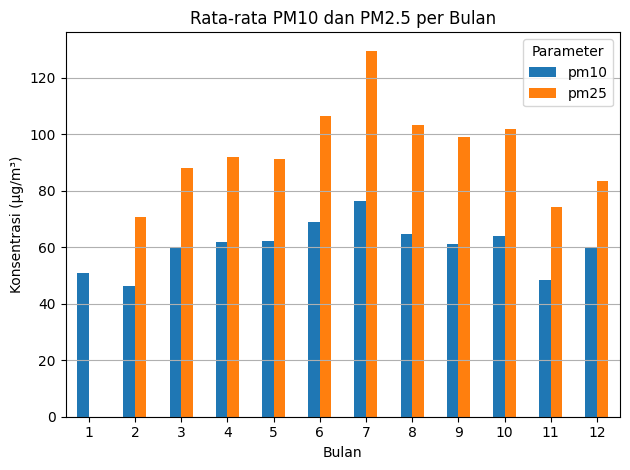

In [ ]:
plt.figure(figsize=(10, 5))
df.groupby('bulan')[['pm10', 'pm25']].mean().plot(kind='bar')
plt.title("Rata-rata PM10 dan PM2.5 per Bulan")
plt.ylabel("Konsentrasi (µg/m³)")
plt.xlabel("Bulan")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Parameter')
plt.tight_layout()
plt.show()


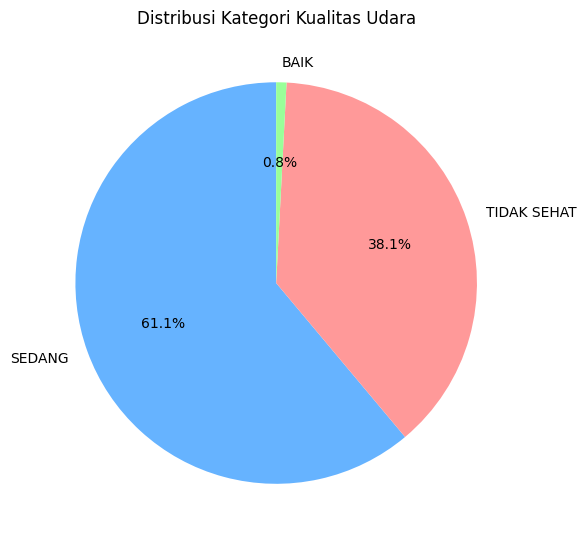

In [ ]:
plt.figure(figsize=(6, 6))
df['categori'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999', '#99ff99']
)
plt.title("Distribusi Kategori Kualitas Udara")
plt.ylabel('')
plt.tight_layout()
plt.show()


In [ ]:
print("10 Hari dengan PM2.5 Tertinggi:")
print(df[['tanggal', 'location', 'pm25']].sort_values(by='pm25', ascending=False).head(10))

10 Hari dengan PM2.5 Tertinggi:
       tanggal location   pm25
195 2021-07-15     DKI4  174.0
184 2021-07-04     DKI4  161.0
287 2021-10-15     DKI4  157.0
189 2021-07-09     DKI4  156.0
210 2021-07-30     DKI4  154.0
185 2021-07-05     DKI4  153.0
198 2021-07-18     DKI4  150.0
205 2021-07-25     DKI4  148.0
200 2021-07-20     DKI4  147.0
175 2021-06-25     DKI4  147.0


In [86]:
from langchain_community.llms import Replicate

llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    model_kwargs={
        "temperature": 0.2,
        "max_new_tokens": 1024,
        "top_p": 0.9
    }
)

prompt = f"""
Berikut adalah data kualitas udara di Jakarta:

Contoh data (10 baris pertama):
{df[['tanggal', 'location', 'pm10', 'pm25', 'so2', 'co', 'o3', 'no2']].head(10).to_string(index=False)}

Jawab secara singkat dan jelas:

1. Apakah kualitas udara tergolong baik atau buruk?

2. Parameter apa yang paling tinggi nilainya?

3. Apakah ada risiko kesehatan utama dari data ini?

Jawaban cukup dalam 2–3 kalimat per poin.
"""

response = llm.invoke(prompt)
print("Hasil dari LLM:\n")
print(response)


Hasil dari LLM:

1. Kualitas udara di Jakarta tergolong buruk, terutama terlihat dari nilai PM10 dan PM2.5 yang sering melebihi batas yang diperkenankan (40 dan 20 mikrogram/m³ untuk PM10 dan PM2.5 secara harian, dan 35 dan 15 secara masa kumulatif 24 jam).

2. Parameter dengan nilai paling tinggi adalah CO (monoksida karbon) pada beberapa hari tersebut, dengan nilai mencapai 80 ppm (part per million).

3. Risiko kesehatan utama dari data ini meliputi efek penyakit jantung dan paru-paru akibat penyebaran partikel ketiga (PM2.5) yang mencapai batas yang tidak sehati, serta risiko penyakit paru akibat monoksida karbon (CO) yang juga melebihi batas yang diperkenankan.
